In [1]:
import pandas as pd
import numpy as np 
np.random.seed(10)

**Classification**

In [2]:
# get the data 

heart_disease = pd.read_csv("13.1 heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
heart_disease.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [5]:
# choose a model 

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# split the data into X features and y labels 

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# fit the model 

clf.fit(X_train,y_train)

# test the model 

clf.score(X_test,y_test)

# predict the model 

y_preds = clf.predict(X_test)
y_preds

# predict the probabilities 

y_preds_proba = clf.predict_proba(X_test)
y_preds_proba[:10]

# select positive values 

preds_positive = y_preds_proba[:,1]

In [6]:
from sklearn.model_selection import cross_val_score
cross_val_score = cross_val_score(clf,X,y,cv=5)
cross_val_score
print(f"The cross val score is:{np.mean(cross_val_score)*100:.2f}")

The cross val score is:83.82


In [7]:
preds_positive

array([0.1 , 0.37, 0.3 , 0.72, 0.16, 0.68, 0.31, 0.72, 0.85, 0.1 , 0.96,
       0.12, 0.57, 0.93, 0.17, 0.87, 0.14, 0.  , 0.72, 0.32, 0.12, 0.84,
       0.58, 0.92, 0.4 , 0.16, 0.03, 0.09, 0.87, 0.01, 0.84, 0.13, 0.1 ,
       0.36, 0.  , 0.14, 0.74, 0.46, 0.87, 0.21, 0.07, 0.21, 0.8 , 0.64,
       0.86, 0.49, 0.59, 0.94, 0.75, 0.37, 0.55, 0.85, 0.08, 0.2 , 0.95,
       0.75, 0.83, 0.81, 0.02, 0.06, 0.74])

In [8]:
# plot roc curve 

from sklearn.metrics import roc_curve
fpr,tpr,threshold = roc_curve(y_test,preds_positive)
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.02857143, 0.02857143, 0.02857143, 0.05714286,
       0.08571429, 0.08571429, 0.31428571, 0.34285714, 0.34285714,
       0.37142857, 0.37142857, 0.4       , 0.45714286, 0.51428571,
       0.62857143, 0.62857143, 0.65714286, 0.74285714, 0.94285714,
       1.        ])

In [9]:
len(y_test)

61

In [10]:
len(y_preds_proba)

61

In [11]:
from sklearn.metrics import roc_curve 
fpr,tpr,threshold = roc_curve(y_test,preds_positive)
fpr[:10]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.02857143, 0.02857143, 0.02857143, 0.05714286])

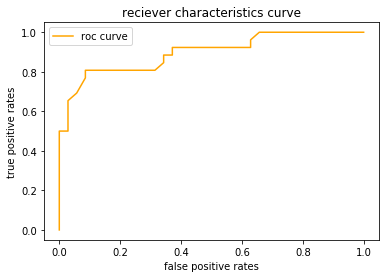

In [12]:
import matplotlib.pyplot as plt
# using matplotlib plot a curve 

def roc_curve(fpr,tpr):
    """
    Plots the false positive rates and true positive rates
    """
    plt.plot(fpr,tpr,color="orange",label="roc curve")
    plt.xlabel("false positive rates")
    plt.ylabel("true positive rates")
    plt.legend()
    plt.title("reciever characteristics curve")
    
roc_curve(fpr,tpr)

In [13]:
# check how much area is covered under the curve

from sklearn.metrics import average_precision_score 
auc_score = average_precision_score(y_test,preds_positive)
print(f"The area under the curve is :{auc_score*100:.2f}%")

The area under the curve is :89.57%


In [14]:
# confusion matrix 

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,y_preds)
conf_mat

array([[27,  8],
       [ 5, 21]], dtype=int64)

In [15]:
pd.crosstab(y_test,y_preds, rownames=["actual models"], colnames=["Predicted model"])

Predicted model,0,1
actual models,,
0,27,8
1,5,21


Text(33.0, 0.5, 'Predicted label')

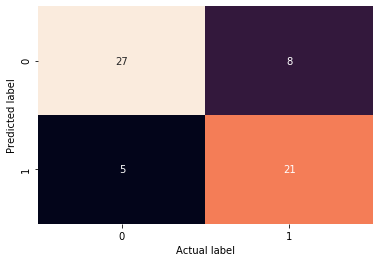

In [16]:
# plot using seaborn's heat map 

import seaborn as sns
fig, ax = plt.subplots()
ax = sns.heatmap(conf_mat,
                 annot=True,
                 cbar=False)
plt.xlabel("Actual label")
plt.ylabel("Predicted label")

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
accuracy = accuracy_score(y_test,y_preds)
accuracy

0.7868852459016393

In [18]:
# create a method to evalaute all scores 

def evaluate_score(y_true,y_preds):
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)
    
    print(f"The accuracy score is:{accuracy*100:.2f}%")
    print(f"The precision score is:{precision*100:.2f}%")
    print(f"The recall score is:{recall*100:.2f}%")
    print(f"The f1 score is:{f1*100:.2f}%")
    
    metric_dict = {"accuracy":round(accuracy,2),
                   "precision":round(precision,2),
                   "recall":round(recall,2),
                   "f1":round(f1,2)}
    
    return metric_dict 

evaluate_score(y_test,y_preds)

The accuracy score is:78.69%
The precision score is:72.41%
The recall score is:80.77%
The f1 score is:76.36%


{'accuracy': 0.79, 'precision': 0.72, 'recall': 0.81, 'f1': 0.76}

In [19]:
# create a train valid and test set

X 
y

train_split = round(0.7 * len(heart_disease))
train_split
valid_split = round(train_split + len(0.15 * heart_disease))
valid_split

# quit 

515

In [20]:
# get the data 

heart_disease = pd.read_csv("13.1 heart-disease.csv")
heart_disease_shuffled = heart_disease.sample(frac=1)

# split into X features and y labels 

X = heart_disease_shuffled.drop("target",axis=1)
y = heart_disease_shuffled["target"]

# split into train and valid split

train_split = round(0.7 * len(heart_disease_shuffled))
train_split
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))
valid_split

# get train valid and test set 

X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

len(X_train), len(y_train), len(X_valid), len(y_valid), len(X_test), len(y_test)

# fit the model 

clf.fit(X_train,y_train)

# predict the model 

y_preds = clf.predict(X_valid)
y_preds

# evaluate a score for train set 

clf.score(X_train,y_train)

# evaluate a score for valid set 

evaluate_score(y_valid,y_preds)

# evaluate score for test set 
print("TEST SCORE")
y_preds = clf.predict(X_test)

evaluate_score(y_test,y_preds)

The accuracy score is:84.44%
The precision score is:80.77%
The recall score is:91.30%
The f1 score is:85.71%
TEST SCORE
The accuracy score is:82.61%
The precision score is:88.00%
The recall score is:81.48%
The f1 score is:84.62%


{'accuracy': 0.83, 'precision': 0.88, 'recall': 0.81, 'f1': 0.85}

### Tuning Hyperparameters by Hand

In [21]:
# get the data 

heart_disease = pd.read_csv("13.1 heart-disease.csv")
heart_disease

# split into X features and y labels 

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# choose a estimator/model and tuned by hand 

clf = RandomForestClassifier(n_estimators=100)

# split into train and test set 

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# fit the model 

clf.fit(X_train,y_train)

# predict the model 
y_preds = clf.predict(X_test)

# evaluate a score 

evaluate_score(y_test,y_preds)

The accuracy score is:72.13%
The precision score is:77.78%
The recall score is:65.62%
The f1 score is:71.19%


{'accuracy': 0.72, 'precision': 0.78, 'recall': 0.66, 'f1': 0.71}

### Tuning hyperparameters by using RandomizedSearchCV and gridSearchCV

In [22]:
grid = {"n_estimators":[10,100,200,500,1000,1200],
        "max_depth":[None,5,10,20,30],
        "max_features":["auto","sqrt"],
        "min_samples_split":[2,4,6],
        "min_samples_leaf":[1,2,4]
       }

from sklearn.model_selection import RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter = 10,
                            verbose=2,
                            cv=5)
# we have all data above 

# fit the model 

rs_clf.fit(X_train,y_train)

# evaluate a score using this tuned model 

evaluate_score(y_test,y_preds)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10, total=   1.8s
[CV] n_estimators=1200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10, total=   1.8s
[CV] n_estimators=1200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10, total=   1.7s
[CV] n_estimators=1200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10, total=   1.8s
[CV] n_estimators=1200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=10, total=   1.7s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=5, total=   1.7s
[CV] n_estimators=1200, min_samples_split=2, 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   49.1s finished


{'accuracy': 0.72, 'precision': 0.78, 'recall': 0.66, 'f1': 0.71}

In [23]:
# use different models and evaluate score 

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

models = {"Logistic_regression":LogisticRegression(),
          "KNN":KNeighborsClassifier(),
          "RandomForest":RandomForestClassifier()}

def fit_and_scores(models,X_train,X_test,y_train,y_test):
    model_scores={}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_scores[name]=model.score(X_test,y_test)
    return model_scores

fit_and_scores(models,X_train,X_test,y_train,y_test)

F:\Softwares\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'Logistic_regression': 0.7704918032786885,
 'KNN': 0.4918032786885246,
 'RandomForest': 0.7213114754098361}

## 8/11/2020

Classification 
Regression

In [24]:
# data heart-disease 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

np.random.seed(19)

heart_disease = pd.read_csv("13.1 heart-disease.csv")

heart_disease_shuffled = heart_disease.sample(frac=1)

# check for missing values 

heart_disease.isna().sum()

# check the data types 

heart_disease.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [25]:
np.random.seed(10)
# create a model 

# split into X features and y labels features are those through which we can predict the labels 

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# choose the model 

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# split into train and test set 

from sklearn.model_selection import train_test_split 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# fit the model 

clf.fit(X_train,y_train)

# predict the model 

y_preds = clf.predict(X_test)
y_preds[:10],y_test[:10]

# evaluate the score using score method 

clf.score(X_test,y_test)

# predict the probabilities 

y_preds_proba = clf.predict_proba(X_test)
y_preds_proba[:10],y_preds[:10]

# select only positive values 

y_preds_positive = y_preds_proba[:,1]
y_preds_positive[:10],y_preds_proba[:10]


(array([0.1 , 0.37, 0.3 , 0.72, 0.16, 0.68, 0.31, 0.72, 0.85, 0.1 ]),
 array([[0.9 , 0.1 ],
        [0.63, 0.37],
        [0.7 , 0.3 ],
        [0.28, 0.72],
        [0.84, 0.16],
        [0.32, 0.68],
        [0.69, 0.31],
        [0.28, 0.72],
        [0.15, 0.85],
        [0.9 , 0.1 ]]))

In [26]:
# plot roc-curve curve

from sklearn.metrics import roc_curve

fpr,tpr,threshold = roc_curve(y_test,y_preds_positive)
fpr[:10],tpr[:10]

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.02857143, 0.02857143, 0.02857143, 0.05714286]),
 array([0.        , 0.03846154, 0.19230769, 0.30769231, 0.34615385,
        0.5       , 0.5       , 0.57692308, 0.65384615, 0.69230769]))

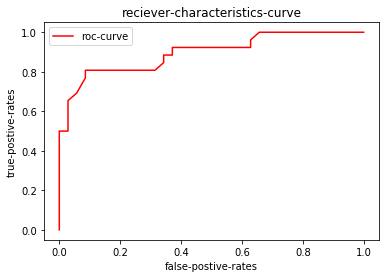

In [27]:
# plot the curve 

def roc_curve(fpr,tpr):
    """
    Plot the curve with false postive rates and true positive
    """
    plt.plot(fpr,tpr,color="red",label="roc-curve")
    plt.xlabel("false-postive-rates")
    plt.ylabel("true-postive-rates")
    plt.legend()
    plt.title("reciever-characteristics-curve")
    plt.show()
    
roc_curve(fpr,tpr)

In [28]:
# check the accuracy that how much area is covered underv the curve

from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test,y_preds_positive)
auc_score

print(f"The area covered under the curve is:{auc_score*100:.2f}%")

The area covered under the curve is:89.62%


In [29]:
# plot confusion matrix 

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,y_preds)
conf_mat

# visualize more clearly 

pd.crosstab(y_test,y_preds,rownames=["actual-labels"],colnames=["predicted-labels"])

predicted-labels,0,1
actual-labels,,
0,27,8
1,5,21


Text(33.0, 0.5, 'Predicted-labels')

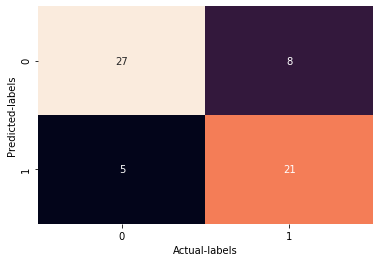

In [30]:
# visualize more clearly using seaborn's-heatmap

import seaborn as  sns
fig,ax = plt.subplots()
ax = sns.heatmap(conf_mat,
            annot=True,
            cbar=False
            )
plt.xlabel("Actual-labels")
plt.ylabel("Predicted-labels")


In [31]:
# evaluate the score using different methods 

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

accuracy = accuracy_score(y_test,y_preds)
accuracy

0.7868852459016393

In [32]:
def evaluate_score(y_true,y_preds):
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)
    
    metric_dict = {"accuracy":round(accuracy,2),
                   "precision":round(precision,2),
                   "recall":round(recall,2),
                   "f1":round(f1,2)}
    
    print(f"The accuracy score is:{accuracy*100:.2f}%")
    print(f"The precisuion score is:{precision*100:.2f}%")
    print(f"The recall score is:{recall*100:.2f}%")
    print(f"The f1 score is:{f1*100:.2f}%")
    
    return metric_dict

evaluate_score(y_test,y_preds)

The accuracy score is:78.69%
The precisuion score is:72.41%
The recall score is:80.77%
The f1 score is:76.36%


{'accuracy': 0.79, 'precision': 0.72, 'recall': 0.81, 'f1': 0.76}

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.84      0.77      0.81        35
           1       0.72      0.81      0.76        26

    accuracy                           0.79        61
   macro avg       0.78      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61



In [34]:
# now will split into train valid and test set 

# get the data 

heart_disease_shuffled

# split into X features and y labels 

X = heart_disease_shuffled.drop("target",axis=1)
y = heart_disease["target"]

train_split = round(0.7*len(heart_disease_shuffled))
(train_split)

valid_split = round(train_split + 0.15*len(heart_disease_shuffled))
valid_split


# split into train valid and test set 

X_train,y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split],y[train_split:valid_split]
X_test,y_test = X[valid_split:],y[valid_split:]

len(X_train),len(y_train)
len(X_valid),len(y_valid)
len(X_test),len(y_test)

# fit the model 

clf.fit(X_train,y_train)

# predict the valid test 

y_preds_valid = clf.predict(X_valid)


evaluate_score(y_valid,y_preds_valid)

y_preds = clf.predict(X_test)

evaluate_score(y_test,y_preds)

The accuracy score is:0.00%
The precisuion score is:0.00%
The recall score is:0.00%
The f1 score is:0.00%
The accuracy score is:10.87%
The precisuion score is:0.00%
The recall score is:0.00%
The f1 score is:0.00%


F:\Softwares\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Softwares\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 0.11, 'precision': 0.0, 'recall': 0.0, 'f1': 0.0}

## Tuning Hyperparameters 

**BY HAND**



In [35]:
# get the data 

heart_disease
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# tuned a model by hand 

clf_2 = RandomForestClassifier(n_estimators=100)

# split into X features and y labels 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# fit the model 

clf_2.fit(X_train,y_train)

# predict the model 

y_preds = clf.predict(X_test)

evaluate_score(y_test,y_preds)

The accuracy score is:44.26%
The precisuion score is:46.00%
The recall score is:76.67%
The f1 score is:57.50%


{'accuracy': 0.44, 'precision': 0.46, 'recall': 0.77, 'f1': 0.57}

### Randomized_SearchCV

In [36]:
grid = {"n_estimators":[10,100,200],
        "max_depth":[None,5,10,20],
        "max_features":["auto","sqrt"],
        "min_samples_split":[2,4,6],
        "min_samples_leaf":[1,2,4]}

# get the data 

X,y

# choose a tuned model 

from sklearn.model_selection import RandomizedSearchCV
clf_rs = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10,
                            cv=5,
                            verbose=2)
# split into train and test set 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# fit the tuned model 

clf_rs.fit(X_train,y_train)

# predict the model 

y_preds = clf_rs.predict(X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, total=   0.2s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, total=   0.2s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, total=   0.1s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, total=   0.2s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, total=   0.2s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5, total=   0.3s
[CV] n_estimators=200, min_samples_split=2, min_sample

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    8.7s finished


In [37]:
evaluate_score(y_test,y_preds)

The accuracy score is:78.69%
The precisuion score is:73.17%
The recall score is:93.75%
The f1 score is:82.19%


{'accuracy': 0.79, 'precision': 0.73, 'recall': 0.94, 'f1': 0.82}

In [38]:
clf_rs.best_params_

{'n_estimators': 200,
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10}

In [39]:
clf_tuned = clf_rs.best_params_

clf_tuned.fit(X_train,y_train)

AttributeError: 'dict' object has no attribute 'fit'

## Exhaustively by grid searchCV

In [ ]:
grid = {"n_estimators":[10,100,200],
        "max_depth":[None,5,10,15,20],
        "max_features":["sqrt","auto"],
        "min_samples_split":[2,4,6],
        "min_samples_leaf":[1,2,4]}

# get the data 

heart_disease

# split into X features and y labels 

X,y

# choose a model already we have instantiate the model

# split into train and test set

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# fit the tuned model 

from sklearn.model_selection import GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid,
                      verbose = 2,
                      cv=5)

# fit the tuned model 

gs_clf.fit(X_train,y_train)

# predict the tuned model 

y_preds = gs_clf.predict(X_test)

# evaluate the score 

evaluate_score(y_test,y_preds)

In [ ]:
evaluate_score(y_test,y_preds)

In [ ]:
gs_clf.best_params_

## use different models 


In [ ]:
## logistic regression 
## knn model 
## Randomforest model

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

models = {"Logistic-regression":LogisticRegression(),
          "KNN":KNeighborsClassifier(),
          "Random-forest":RandomForestClassifier()}

def fit_and_scores(models,X_train,X_test,y_train,y_test):
    model_score={}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_score[name]=model.score(X_test,y_test)
    return model_score

scores = fit_and_scores(models,X_train,X_test,y_train,y_test)
scores

#### REGRESSION DATA SET 

In [ ]:
# get the data 

car_sales = pd.read_csv("9.1 car-sales-extended-missing-data.csv")
car_sales

In [ ]:
car_sales.isna().sum()

In [ ]:
car_sales.dtypes

In [ ]:
# remove missing values 

car_sales.dropna(subset=["Price"],inplace=True)
car_sales
car_sales.isna().sum()

In [ ]:
# remove further missing values using impute method 

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

cat_imputer = SimpleImputer(strategy="constant",fill_value=["Honda","White"])
num_imputer = SimpleImputer(strategy="mean")
doors_imputer = SimpleImputer(strategy="constant",fill_value=4.0)

cat_features = ["Make","Colour"]
num_features = ["Odometer (KM)"]
doors_features = ["Doors"]

transformer = ColumnTransformer([("cat_imputer",cat_imputer,cat_features),
                                 ("num_imputer",num_imputer,num_features),
                                 ("doors_imputer",doors_imputer,doors_features)
                                ])

transformed_X = transformer.fit_transform(car_sales)
transformed_X

car_sales_filled = pd.DataFrame(transformed_X,columns=["Make","Colour","Odometer (KM)","Doors"])
car_sales_filled



In [ ]:
car_sales_filled.isna().sum()

In [ ]:
car_sales_filled.dtypes

In [ ]:
car_sales_filled["Odometer (KM)"] = pd.to_numeric(car_sales_filled["Odometer (KM)"])
car_sales_filled.dtypes

car_sales_filled["Doors"] = pd.to_numeric(car_sales_filled["Doors"])
car_sales_filled.dtypes

car_sales_filled

In [ ]:
# make another columns to numeric with help of using onehotencoder

from sklearn.preprocessing import OneHotEncoder

categorical_features = ["Make","Colour"]

one_hot = OneHotEncoder()

transformer1 = ColumnTransformer([("one_hot",one_hot,categorical_features)])

X_transformed = transformer1.fit_transform(car_sales_filled)
X_transformed

car_sales_numeric = pd.DataFrame(X_transformed)
car_sales_numeric

In [ ]:
# split into X features and y labels 

X = car_sales_numeric
y = car_sales["Price"]

# choose a model 

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

# split into train and test set 

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_transformed,y,test_size=0.2)

# fit the model 

model.fit(X_train,y_train)

# evalaute the score 

model.score(X_test,y_test)

# predict the model 

y_preds = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

def evaluate_reg_score(y_true,y_preds):
    """
    compare true labels with predicted labels 
    """
    mean_absolute = mean_absolute_error(y_true,y_preds)
    mean_squared = mean_squared_error(y_true,y_preds)
    
    metric_dict = {"mean_absolute_error":mean_absolute,
                   "mean_squared_error":mean_squared}
    
    print(f"Mean-absolute-error:{mean_absolute}")
    print(f"Mean-squared-error:{mean_squared}")
    
    return metric_dict

evaluate_reg_score(y_test,y_preds)

In [ ]:
# get another data sets 

from sklearn.datasets import load_boston
load_boston = load_boston()
load_boston

In [ ]:
boston_df = pd.DataFrame(load_boston["data"],columns=["feature_names"])

In [ ]:
boston_df = pd.DataFrame(load_boston["data"],columns=["feature_names"])


In [ ]:
boston = load_boston()

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
boston

In [ ]:
boston_df = pd.DataFrame(boston["data"],columns=boston["feature_names"])
boston_df["target"]=pd.Series(boston["target"])
boston_df

In [ ]:
# check for missing values 

boston_df.isna().sum()

In [ ]:
boston_df.dtypes

In [ ]:
# split into X features and y labels 

X = boston_df.drop("target",axis=1)
y = boston_df["target"]

# split into training and test set 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# fit the model 

model.fit(X_train,y_train)

# predict the model 

y_preds = model.predict(X_test)

# evluate the score

model.score(X_test,y_test)

evaluate_reg_score(y_test,y_preds)

In [ ]:
df = pd.DataFrame({"Actual-model":y_test,"Predicted-label":y_preds})
df

df["differences"] = df["Actual-model"]-df["Predicted-label"]
df



In [ ]:
df["differences"].mean()

In [ ]:
np.mean(df["differences"])

### We have completed the revision of all what we previously learned

## End-End heart disease problem 


In [47]:
# get the data 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

heart_disease = pd.read_csv("13.1 heart-disease.csv")
heart_disease

heart_disease_shuffled = heart_disease.sample(frac=1)

In [48]:
# data exploration
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [49]:
heart_disease['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

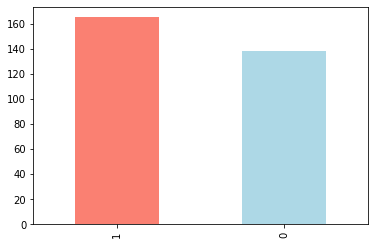

In [53]:
# plot a bar 

heart_disease["target"].value_counts().plot(kind="bar",color=["salmon","Lightblue"])


In [60]:
# compare two columns ie age and target column

heart_disease_comp = pd.crosstab(heart_disease["target"],heart_disease["sex"])
heart_disease_comp


sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), <a list of 2 Text xticklabel objects>)

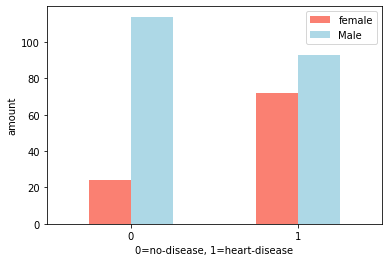

In [67]:
# plot the sex vs target column 

heart_disease_comp.plot(kind="bar",color=["salmon","Lightblue"])
plt.xlabel("0=no-disease, 1=heart-disease")
plt.ylabel("amount")
plt.legend(["female","Male"])
plt.xticks(rotation=0)

In [73]:
# compare age vs target column 

heart_disease_comp2 = pd.crosstab(heart_disease["age"],heart_disease["target"])
heart_disease_comp2

target,0,1
age,,
29,0,1
34,0,2
35,2,2
37,0,2
38,1,2
39,1,3
40,2,1
41,1,9
42,1,7


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 <a list of 41 Text xticklabel objects>)

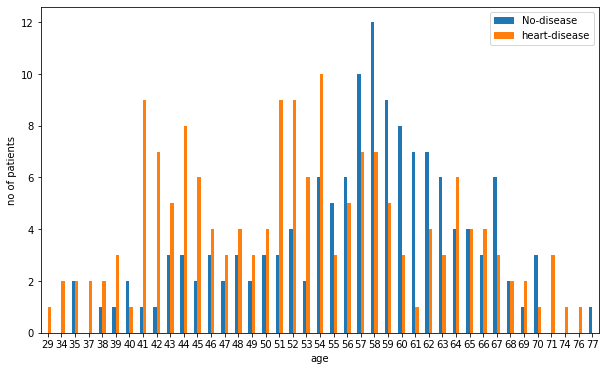

In [82]:
heart_disease_comp2.plot(kind="bar",figsize=(10,6))
plt.xlabel("age")
plt.ylabel("no of patients")
plt.legend(["No-disease","heart-disease"])
plt.xticks(rotation=0)

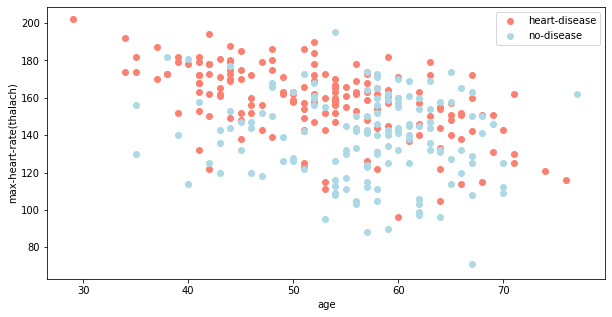

In [86]:
# compare heart disease vs age vs thalach(max heart rate )

plt.figure(figsize=(10,5))

plt.scatter(heart_disease.age[heart_disease.target==1],
            heart_disease.thalach[heart_disease.target==1],
            color="salmon")
plt.scatter(heart_disease.age[heart_disease.target==0],
            heart_disease.thalach[heart_disease.target==0],
            color='lightblue')
plt.xlabel("age")
plt.ylabel("max-heart-rate(thalach)")
plt.legend(["heart-disease","no-disease"])

In [111]:
# use different models and make predictions 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

models = {"Logistic-regression":LogisticRegression(),
          "KNN":KNeighborsClassifier(),
          "Random-forest":RandomForestClassifier()}

def fit_and_score(models,X_train,X_test,y_train,y_test):
    model_scores = {}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)
        print(name,f":{model_scores[name]*100:.2f}%")
    return model_scores

fit_and_score(models,X_train,X_test,y_train,y_test)

F:\Softwares\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic-regression :80.33%
KNN :57.38%
Random-forest :78.69%


{'Logistic-regression': 0.8032786885245902,
 'KNN': 0.5737704918032787,
 'Random-forest': 0.7868852459016393}

In [112]:
# hyper paramater tuning for KNN 

train_scores = []
test_scores = []

neighbors = range(1,21)

# create a instance 

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    
    test_scores.append(knn.score(X_train,y_train))

In [113]:
train_scores

[1.0,
 0.7975206611570248,
 0.7975206611570248,
 0.7603305785123967,
 0.7933884297520661,
 0.7851239669421488,
 0.7479338842975206,
 0.7479338842975206,
 0.731404958677686,
 0.71900826446281,
 0.7148760330578512,
 0.7107438016528925,
 0.7231404958677686,
 0.7107438016528925,
 0.7148760330578512,
 0.7066115702479339,
 0.7066115702479339,
 0.7066115702479339,
 0.6983471074380165,
 0.7024793388429752]

In [114]:
test_scores

[1.0,
 0.7975206611570248,
 0.7975206611570248,
 0.7603305785123967,
 0.7933884297520661,
 0.7851239669421488,
 0.7479338842975206,
 0.7479338842975206,
 0.731404958677686,
 0.71900826446281,
 0.7148760330578512,
 0.7107438016528925,
 0.7231404958677686,
 0.7107438016528925,
 0.7148760330578512,
 0.7066115702479339,
 0.7066115702479339,
 0.7066115702479339,
 0.6983471074380165,
 0.7024793388429752]

In [120]:
## prac

train_scores = []
test_scores = []

neighbors = range(1,21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train
                                 ))

In [121]:
train_scores

[1.0,
 0.7975206611570248,
 0.7975206611570248,
 0.7603305785123967,
 0.7933884297520661,
 0.7851239669421488,
 0.7479338842975206,
 0.7479338842975206,
 0.731404958677686,
 0.71900826446281,
 0.7148760330578512,
 0.7107438016528925,
 0.7231404958677686,
 0.7107438016528925,
 0.7148760330578512,
 0.7066115702479339,
 0.7066115702479339,
 0.7066115702479339,
 0.6983471074380165,
 0.7024793388429752]

In [131]:
# tuning Logistic Regression model 

log_reg_grid = {"C":np.logspace(-4,4,20),
                "solver":["liblinear"]}

from sklearn.model_selection import RandomizedSearchCV

# get the data 

heart_disease

# split into X features and y labels 

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# choose a model 

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

# split into train and test set 

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# instantiate RandomizedsearchCV

rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=log_reg_grid,
                            verbose=2,
                            n_iter=5,
                            cv=5
                           )
# fit the tuned model 

rs_clf.fit(X_train,y_train)
                        

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] solver=liblinear, C=545.5594781168514 ...........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............ solver=liblinear, C=545.5594781168514, total=   0.4s
[CV] solver=liblinear, C=545.5594781168514 ...........................
[CV] ............ solver=liblinear, C=545.5594781168514, total=   0.0s
[CV] solver=liblinear, C=545.5594781168514 ...........................
[CV] ............ solver=liblinear, C=545.5594781168514, total=   0.0s
[CV] solver=liblinear, C=545.5594781168514 ...........................
[CV] ............ solver=liblinear, C=545.5594781168514, total=   0.0s
[CV] solver=liblinear, C=545.5594781168514 ...........................
[CV] ............ solver=liblinear, C=545.5594781168514, total=   0.0s
[CV] solver=liblinear, C=29.763514416313132 ..........................
[CV] ........... solver=liblinear, C=29.763514416313132, total=   0.0s
[CV] solver=liblinear, C=29.763514416313132 ..........................
[CV] ........... solver=liblinear, C=29.763514416313132, total=   0.0s
[CV] solver=liblinear, C=29.763514416313132 ..........................
[CV] .

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.4s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=5, n_jobs=None,
                   param_distributions={'C': a...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+

In [132]:
# evaluate the score 

rs_clf.score(X_test,y_test)

0.8360655737704918

In [133]:
rs_clf.best_params_

{'solver': 'liblinear', 'C': 0.08858667904100823}

## feature Importance 

In [135]:
from sklearn.linear_model import LogisticRegression

rs_clf.best_params_

{'solver': 'liblinear', 'C': 0.08858667904100823}

In [138]:
log_reg_clf = LogisticRegression(solver="liblinear",C=0.08858667904100823)

log_reg_clf.fit(X_train,y_train)

log_reg_clf.coef_



array([[-0.00448704, -0.579474  ,  0.56388918, -0.01003066, -0.00212902,
        -0.00924899,  0.16863346,  0.02615796, -0.39826876, -0.53009912,
         0.21258965, -0.58904058, -0.4855473 ]])

In [141]:
feature_dict = dict(zip(heart_disease.columns,list(log_reg_clf.coef_[0])))
feature_dict

{'age': -0.0044870389980449605,
 'sex': -0.5794739996579005,
 'cp': 0.5638891814420032,
 'trestbps': -0.010030659812620316,
 'chol': -0.0021290241440977227,
 'fbs': -0.009248985399041308,
 'restecg': 0.16863345591840773,
 'thalach': 0.02615796221241762,
 'exang': -0.39826876133781186,
 'oldpeak': -0.5300991192423189,
 'slope': 0.21258965294319335,
 'ca': -0.5890405818523338,
 'thal': -0.4855472979180114}

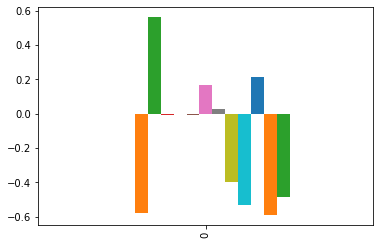

In [144]:
df_feature_imp = pd.DataFrame(feature_dict,index=[0])
df_feature_imp.plot(kind="bar",legend=False)

Text(0.5, 1.0, 'feature_importance')

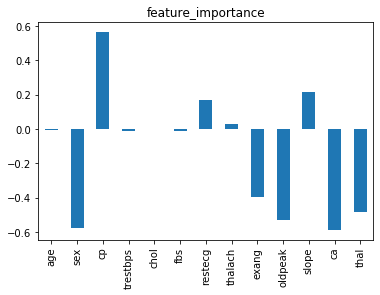

In [147]:
df_feature_imp.T.plot(kind="bar",legend=False)
plt.title("feature_importance")